# Subspecies of Big Cats

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Path to dataset
data_path = r"kucing_besaq/"

# Image dimensions
height, width = 224, 224  # Input image dimensions
input_size = 3 * height * width  # For RGB images
print(f"Calculated input size for RGB: {input_size}")

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # 20% of the dataset for validation
    rotation_range=30,  # Randomly rotate images
    width_shift_range=0.2,  # Horizontally shift images
    height_shift_range=0.2,  # Vertically shift images
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom in/out
    horizontal_flip=True  # Flip images horizontally
)

Calculated input size for RGB: 150528


Found 8000 images belonging to 8 classes.
Found 2000 images belonging to 8 classes.


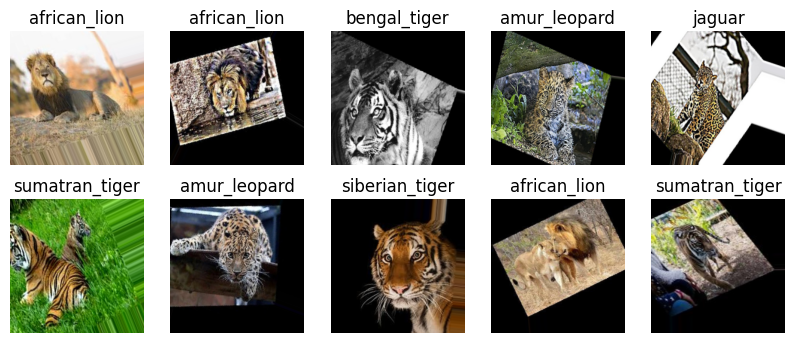

In [4]:
# Load dataset
def train_test_generators(data_path):
    train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(height, width),
    batch_size=64,  # Adjust based on memory and training speed
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'
)

    val_gen = datagen.flow_from_directory(
        data_path,
        target_size=(height, width),
        batch_size=64,
        class_mode='categorical',
        subset='validation'
        )
    return train_gen, val_gen

train_gen, val_gen = train_test_generators(data_path)

# Get the mapping of class indices to folder names
class_indices = train_gen.class_indices
index_to_class = {v: k for k, v in class_indices.items()}  # Reverse the dictionary

# Display some images with translated labels
images, labels = next(train_gen)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    # Convert one-hot encoded labels to class names
    class_name = index_to_class[np.argmax(labels[i])]
    ax.set_title(f"{class_name}")  
    ax.axis('off')
plt.show()

In [65]:
output_size = len(train_gen.class_indices)
print(f"Detected {output_size} classes: {train_gen.class_indices}")

Detected 8 classes: {'african_leopard': 0, 'african_lion': 1, 'amur_leopard': 2, 'asiatic_lion': 3, 'bengal_tiger': 4, 'jaguar': 5, 'siberian_tiger': 6, 'sumatran_tiger': 7}


In [66]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

init_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(height, width, 3)) #british accent

x = init_model.output
x = GlobalAveragePooling2D()(x)  # Reduces feature maps to a vector
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.69)(x)  # Dropout for regularization
predictions = Dense(output_size, activation='softmax')(x)  # Final output layer with softmax activation

# Create the final model
model = Model(inputs=init_model.input, outputs=predictions)
for layer in init_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define callbacks
checkpoint = ModelCheckpoint("kucing.keras", 
                            monitor="val_accuracy", save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor="val_loss", patience=5, verbose=1)

# Calculate steps per epoch and validation steps
steps_per_epoch = train_gen.samples // train_gen.batch_size
validation_steps = val_gen.samples // val_gen.batch_size

# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=20,  # Allow room for EarlyStopping
    validation_data=val_gen,
    validation_steps=validation_steps,
    callbacks=[checkpoint, early_stop]
)

/home/cyberpvt/Pai/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.3962 - loss: 1.6666
Epoch 1: val_accuracy improved from -inf to 0.71421, saving model to kucing.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 118s 888ms/step - accuracy: 0.3972 - loss: 1.6632 - val_accuracy: 0.7142 - val_loss: 0.6745
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.6567 - loss: 0.8067
Epoch 2: val_accuracy improved from 0.71421 to 0.73236, saving model to kucing.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6568 - loss: 0.8065 - val_accuracy: 0.7324 - val_loss: 0.5836
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.7141 - loss: 0.6915
Epoch 3: val_accuracy improved from 0.73236 to 0.73337, saving model to kucing.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 842ms/step - accuracy: 0.7141 - loss: 0.6914 - val_accuracy: 0.7334 - val_loss: 0.5574
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.7356 - loss: 0.6049
Epoch 4: val_accuracy improved from 

In [68]:
model.save("PengesanKucingBesar.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


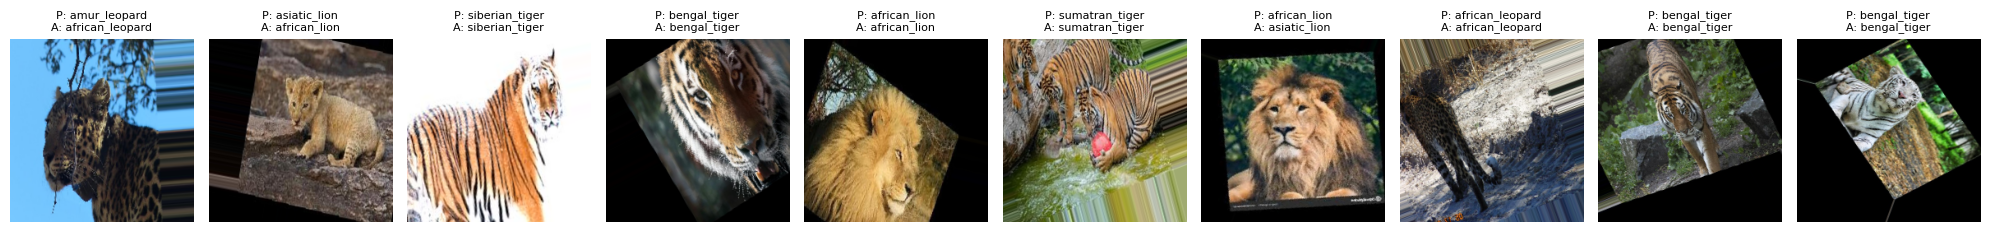

Accuracy = 70.0%


In [87]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model = load_model('PengesanKucingBesar.keras')

# Map class indices to class names (from training data)
class_indices = train_gen.class_indices
index_to_class = {v: k for k, v in class_indices.items()}  # Reverse dictionary for index to class mapping

# Choose a few random samples from the validation set
num_samples_to_display = 10
sample_indices = np.random.choice(len(val_gen), num_samples_to_display, replace=False)
count = 0

# Display the samples and their predicted and actual labels
fig, axes = plt.subplots(1, num_samples_to_display, figsize=(20, 4))
for i, ax in enumerate(axes.flat):
    sample_index = sample_indices[i]
    image, label = val_gen[sample_index]
    
    # Extract individual image and label from batch
    image = image[0]
    label = np.argmax(label[0])  # Convert one-hot label to integer
    
    # Make prediction using the model
    prediction = model.predict(np.expand_dims(image, axis=0))  # Expand dims for prediction
    predicted_label = np.argmax(prediction[0])  # Get the index of the highest probability
    
    # Convert indices to class names
    actual_class = index_to_class[label]
    predicted_class = index_to_class[predicted_label]
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f"P: {predicted_class}\nA: {actual_class}", fontsize=8)  # Use multiline and smaller font
    ax.axis('off')
    if predicted_label == label:
        count += 1

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

print(f"Accuracy = {(count / num_samples_to_display) * 100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


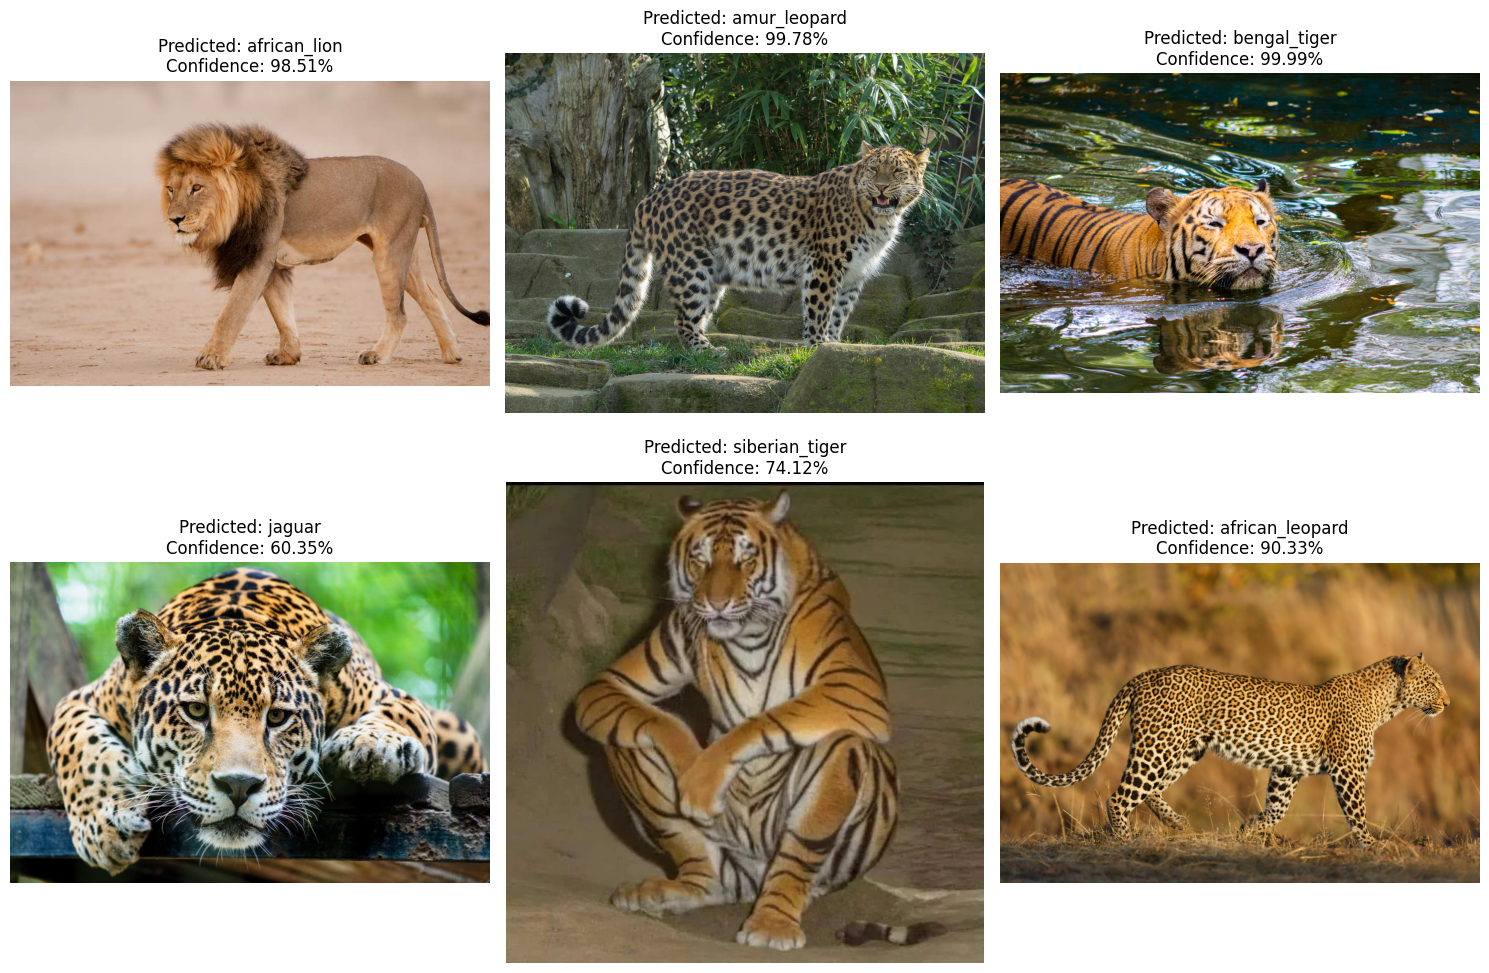

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

def preprocess_image(img_path, target_size):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to the directory containing test images
test_image_dir = r'images/'

# Find all image files in the directory with common image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif', '.webp',)  # Add more extensions if needed
test_image_paths = [os.path.join(test_image_dir, file) for file in os.listdir(test_image_dir) if file.lower().endswith(image_extensions)]

# Load the trained model
model = tf.keras.models.load_model('PengesanKucingBesar.keras')

# Get class labels
class_labels = {v: k for k, v in train_gen.class_indices.items()}

# Grid layout configuration
num_images = len(test_image_paths)
cols = 3  # Number of columns in the grid
rows = (num_images // cols) + int(num_images % cols > 0)  # Adjust rows based on number of images

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, img_path in enumerate(test_image_paths):
    if os.path.exists(img_path):
        # Process the image and predict
        processed_img = preprocess_image(img_path, target_size=(height, width))
        predictions = model.predict(processed_img)
        predicted_class = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class] * 100
        predicted_label = class_labels[predicted_class]

        # Display image and prediction
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
        axes[i].axis('off')
    else:
        axes[i].set_title("Image not found")
        axes[i].axis('off')

# Turn off unused subplots
for i in range(len(test_image_paths), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

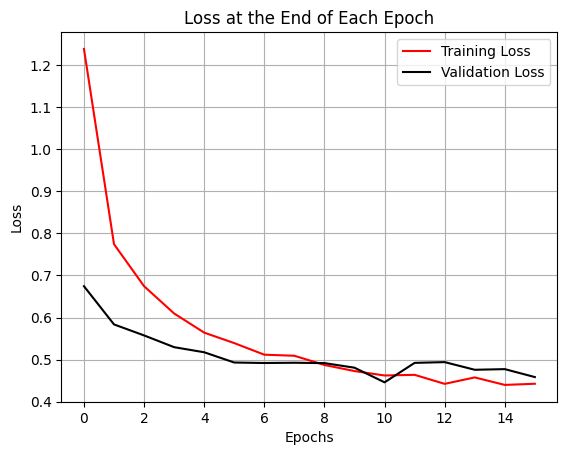

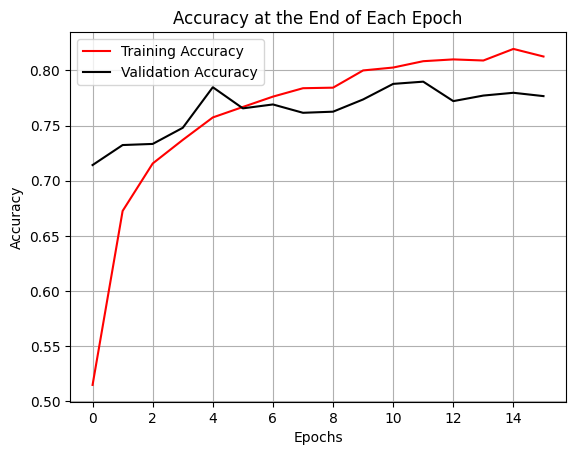

In [95]:
# Plot the results for Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='black')
plt.title('Loss at the End of Each Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Plot the results for Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='black')
plt.title('Accuracy at the End of Each Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 851ms/step


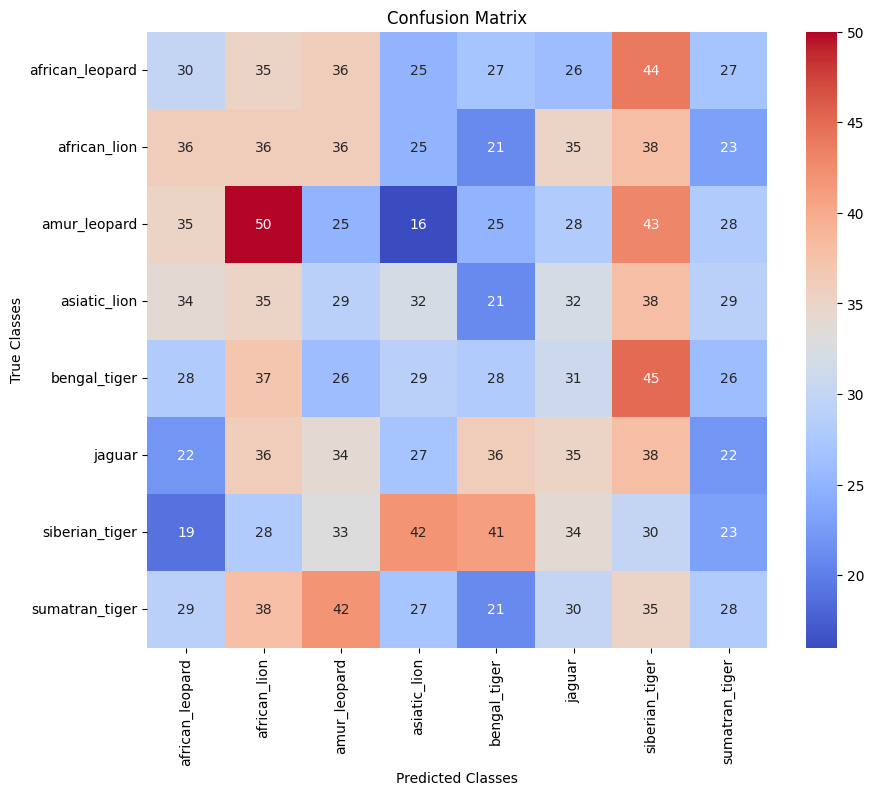

Classification Report:


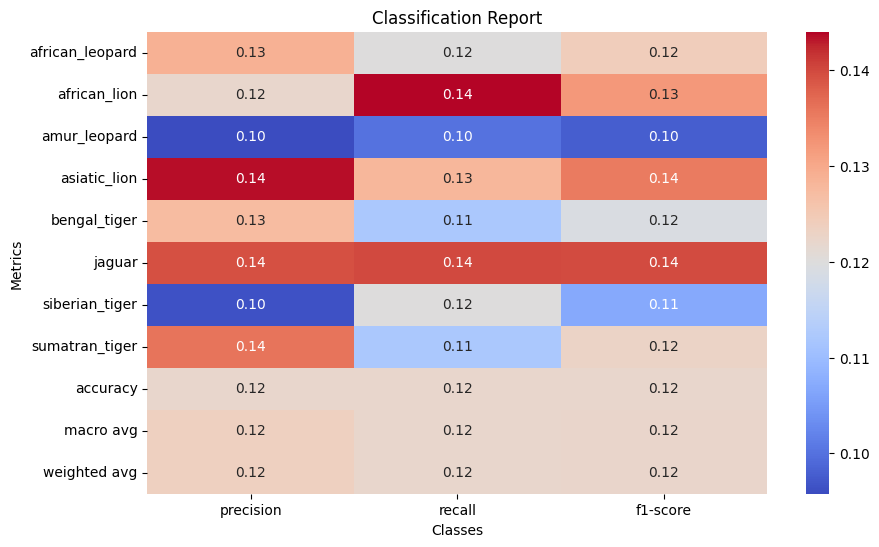

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Map class indices to class labels
class_labels = {v: k for k, v in val_gen.class_indices.items()}

# Generate predictions
val_preds = model.predict(val_gen)
y_pred = np.argmax(val_preds, axis=1)  # Predicted classes
y_true = val_gen.classes  # True classes

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
classification_rep = classification_report(y_true, y_pred, target_names=list(class_labels.values()), output_dict=True)

# Convert classification report to DataFrame
classification_df = pd.DataFrame(classification_rep).iloc[:-1, :].T  # Exclude the accuracy row

# Visualize classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(classification_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()


In [105]:
import tensorflow as tf
import matplotlib.pyplot as plt

# List of model filenames and names
model_files = ["kucing.keras", "BigCitCat.keras", "MoveOn.keras"]
model_names = ["Model 1", "Model 2", "Current Model"]

# Store metrics for plotting
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Loop through each model, evaluate, and store results
for model_file, model_name in zip(model_files, model_names):
    # Load the model
    model = tf.keras.models.load_model(model_file)
    
    # Evaluate the model on the training dataset
    train_loss, train_acc = model.evaluate(train_gen, verbose=0)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    
    # Evaluate the model on the validation/test dataset
    val_loss, val_acc = model.evaluate(val_gen, verbose=0)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    
    # Print the results
    print(f"{model_name}:")
    print(f"  Train Loss: {train_loss:.4f}")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Loss: {val_loss:.4f}")
    print(f"  Test Accuracy: {val_acc:.4f}\n")




Model 1:
  Train Loss: 0.2770
  Train Accuracy: 0.8911
  Test Loss: 0.4714
  Test Accuracy: 0.7910

Model 2:
  Train Loss: 0.2570
  Train Accuracy: 0.9059
  Test Loss: 0.4566
  Test Accuracy: 0.7875

Current Model:
  Train Loss: 0.2568
  Train Accuracy: 0.8991
  Test Loss: 0.4669
  Test Accuracy: 0.7805



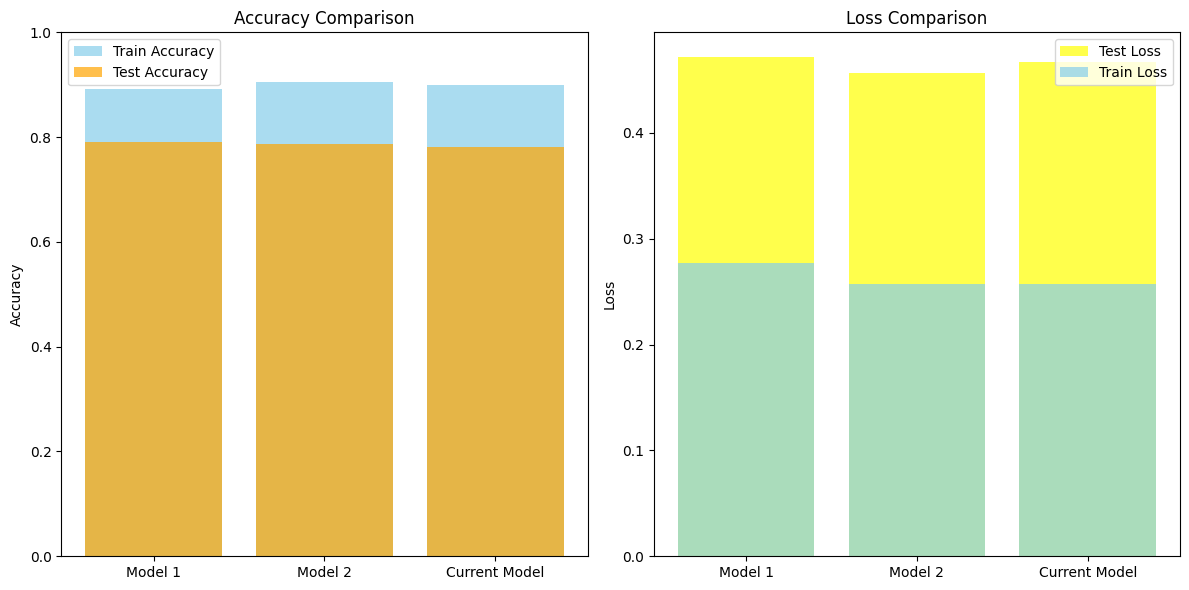

In [109]:
# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy comparison
axes[0].bar(model_names, train_accuracies, label="Train Accuracy", alpha=0.7, color="skyblue")
axes[0].bar(model_names, val_accuracies, label="Test Accuracy", alpha=0.7, color="orange")
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
axes[0].legend()

# Loss comparison
axes[1].bar(model_names, val_losses, label="Test Loss", alpha=0.7, color="yellow")
axes[1].bar(model_names, train_losses, label="Train Loss", alpha=0.7, color="skyblue")
axes[1].set_title("Loss Comparison")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Show plots
plt.tight_layout()
plt.show()

Total Model Parameters: 2422984
125/125 ━━━━━━━━━━━━━━━━━━━━ 101s 778ms/step
Mean Average Precision (mAP): 0.1249


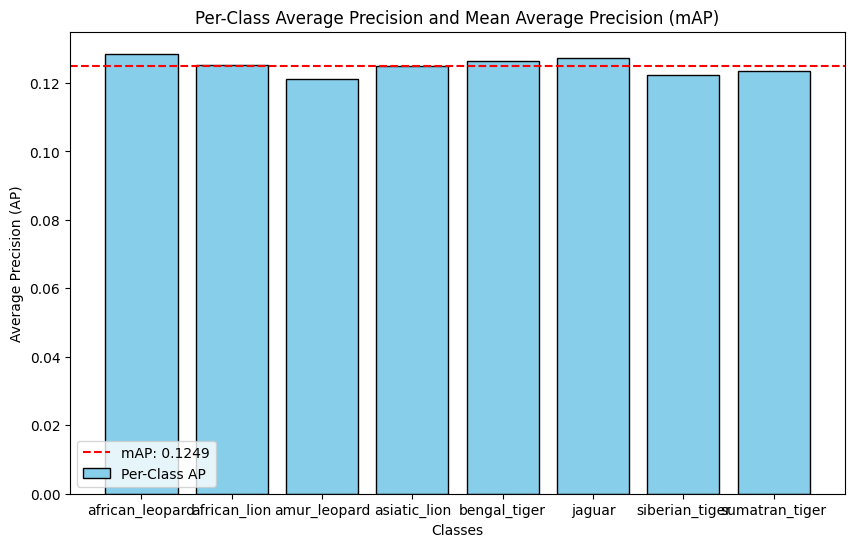


Model Evaluation Summary:
Total Model Parameters: 2422984
Mean Average Precision (mAP): 0.1249


In [97]:
from sklearn.metrics import average_precision_score

# Get the total number of model parameters
model_parameters = model.count_params()
print(f"Total Model Parameters: {model_parameters}")

# Get true labels and predictions
test_labels = train_gen.classes  # True labels for the test dataset
predictions = model.predict(train_gen, steps=train_gen.samples // train_gen.batch_size, verbose=1)

# Ensure predictions shape matches test_labels
if predictions.shape[0] != len(test_labels):
    print("Mismatch in the number of predictions and test labels!")
    print(f"Predictions: {predictions.shape[0]}, Test Labels: {len(test_labels)}")
else:
    # One-hot encode true labels
    test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=len(class_labels))
    
    # Calculate per-class Average Precision
    average_precisions = []
    for i in range(len(class_labels)):
        class_ap = average_precision_score(test_labels_one_hot[:, i], predictions[:, i])
        average_precisions.append(class_ap)
    
    # Calculate mean Average Precision (mAP)
    mAP = np.mean(average_precisions)
    print(f"Mean Average Precision (mAP): {mAP:.4f}")

    # Visualization of per-class AP and mAP
    class_names = list(class_labels.values())
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, average_precisions, color='skyblue', edgecolor='black', label='Per-Class AP')
    plt.axhline(y=mAP, color='red', linestyle='--', label=f'mAP: {mAP:.4f}')
    plt.xlabel('Classes')
    plt.ylabel('Average Precision (AP)')
    plt.title('Per-Class Average Precision and Mean Average Precision (mAP)')
    plt.legend()
    plt.show()

# Print a summary of all metrics
print("\nModel Evaluation Summary:")
print(f"Total Model Parameters: {model_parameters}")
print(f"Mean Average Precision (mAP): {mAP:.4f}")

# Final Conclusion

### After evaluating the model's parameters, accuracy, mean average precision (mAP), and training time, the chosen model **MobileNetV2** demonstrates a strong balance between performance and computational efficiency.

### Key Metrics:
- **Total Model Parameters**: 2,422,984  
- **Test Accuracy**: 0.8991  
- **Mean Average Precision (mAP)**: 0.1249  
- **Training Time**: 29 minutes and 15 seconds  

### Analysis:
- The **Mean Average Precision (mAP)** is relatively low (0.1249), likely due to the **complexity of the dataset**, which may include:
  - Imbalanced classes.
  - Subtle distinctions between categories that make precise predictions more challenging.
- Despite this, the model achieves a high overall accuracy (89.91%), indicating its capability to classify most samples correctly, even if precision across all classes is not uniformly high.

- While the training time was moderate (29 minutes and 15 seconds), the lightweight architecture of MobileNetV2 ensures efficient resource usage, making it suitable for real-time inference and large-scale deployment.

### Conclusion:
**Based on these metrics and considerations, MobileNetV2 with transfer learning and fine-tuning is the best-suited model for this classification task.**  
Its balance between computational efficiency and strong classification performance makes it an ideal choice, especially for applications requiring fast and scalable solutions.
